## Load the file 'room-temperature.csv' and plot the readings against time

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('room-temperature.csv')

# Display the first few rows of the data
df.head()


,Date,FrontLeft,FrontRight,BackLeft,BackRight
0,4/11/2010 11:30,295.2,297.0,295.8,296.3
1,4/11/2010 12:00,296.2,296.4,296.2,296.3
2,4/11/2010 12:30,297.3,297.5,296.7,297.1
3,4/11/2010 13:00,295.9,296.7,297.4,297.0
4,4/11/2010 13:30,297.2,296.5,297.6,297.4


The dataset has columns for the date (time-stamp) and readings from the four sensors: FrontLeft, FrontRight, BackLeft, and BackRight.

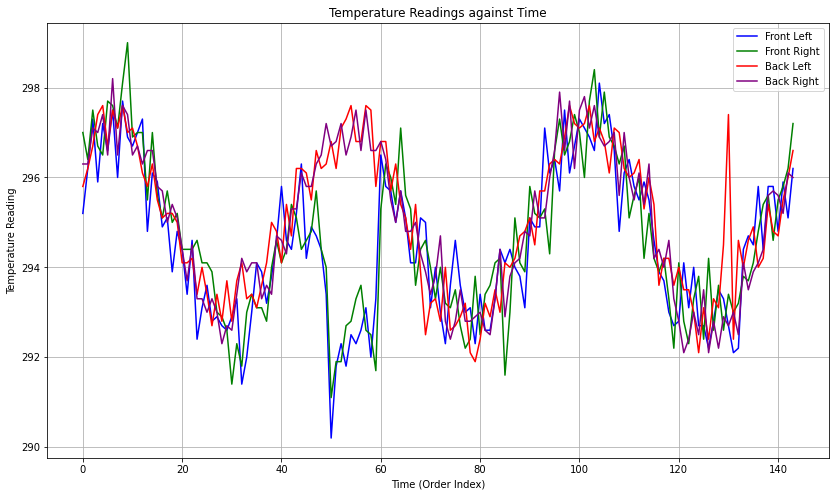

In [6]:
# Plotting the readings against time (order index)
plt.figure(figsize=(14, 8))
plt.plot(df['FrontLeft'], label='Front Left', color='blue')
plt.plot(df['FrontRight'], label='Front Right', color='green')
plt.plot(df['BackLeft'], label='Back Left', color='red')
plt.plot(df['BackRight'], label='Back Right', color='purple')
plt.xlabel('Time (Order Index)')
plt.ylabel('Temperature Reading')
plt.title('Temperature Readings against Time')
plt.legend()
plt.grid(True)
plt.show()


 From the plot, we can see fluctuations in temperature readings, which might suggest some external factors influencing the measurements.

## Proceed to the PCA analysis keeping the components responsible for 93% of the variance. Plot these two components against time.

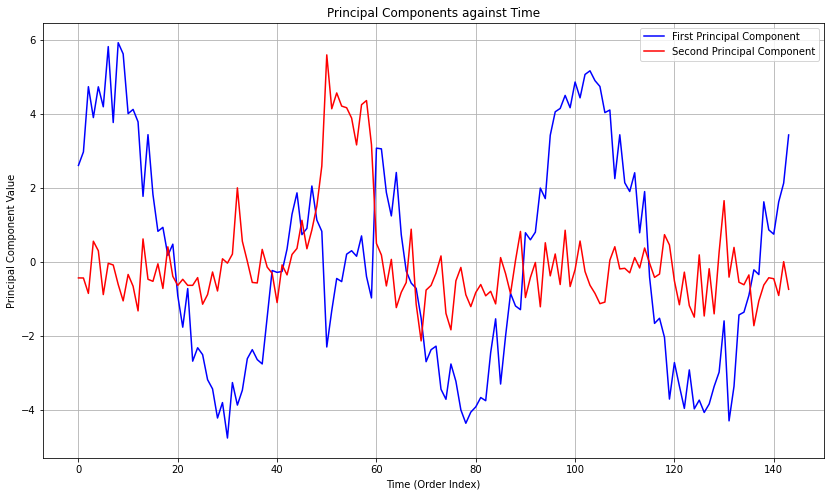

In [8]:
from sklearn.decomposition import PCA

# Drop the 'Date' column as we only need sensor readings for PCA
data_for_pca = df.drop(columns=['Date'])

# Initialize PCA
pca = PCA(n_components=0.93)  # Keep components responsible for 93% of the variance
transformed_data = pca.fit_transform(data_for_pca)

# Plotting the two principal components against time
plt.figure(figsize=(14, 8))
plt.plot(transformed_data[:, 0], label='First Principal Component', color='blue')
plt.plot(transformed_data[:, 1], label='Second Principal Component', color='red')
plt.xlabel('Time (Order Index)')
plt.ylabel('Principal Component Value')
plt.title('Principal Components against Time')
plt.legend()
plt.grid(True)
plt.show()


The plot above displays the first and second principal components derived from the temperature readings against time (order index). The principal components capture the major patterns of variation in the original data.

## Plot the readings of the back-left sensor against the front-left sensor and the readings of the back-right sensor against the front-right sensor

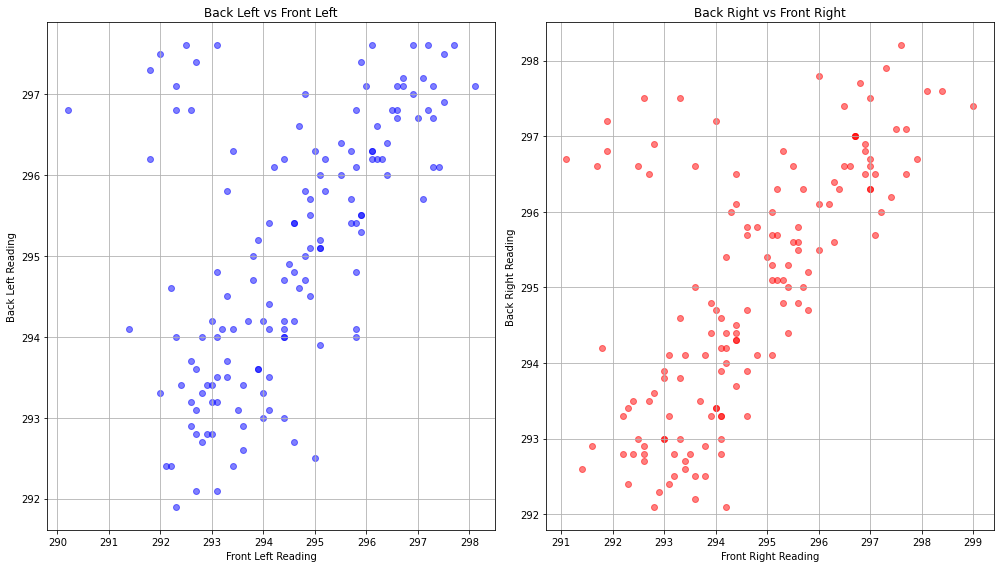

In [9]:
# Plotting readings of BackLeft vs FrontLeft and BackRight vs FrontRight
plt.figure(figsize=(14, 8))

# BackLeft vs FrontLeft
plt.subplot(1, 2, 1)
plt.scatter(df['FrontLeft'], df['BackLeft'], color='blue', alpha=0.5)
plt.xlabel('Front Left Reading')
plt.ylabel('Back Left Reading')
plt.title('Back Left vs Front Left')
plt.grid(True)

# BackRight vs FrontRight
plt.subplot(1, 2, 2)
plt.scatter(df['FrontRight'], df['BackRight'], color='red', alpha=0.5)
plt.xlabel('Front Right Reading')
plt.ylabel('Back Right Reading')
plt.title('Back Right vs Front Right')
plt.grid(True)

plt.tight_layout()
plt.show()


From the plots above, we can make the following observations:

Back Left vs Front Left: The readings from the back-left sensor and the front-left sensor tend to follow a linear trend. This suggests that when the front-left sensor's reading increases, the back-left sensor's reading tends to increase as well, and vice versa. There's a strong correlation between the two.

Back Right vs Front Right: Similarly, the readings from the back-right and front-right sensors also follow a linear trend, indicating a strong correlation between these two sensors.

The linear relationship between sensors on the same side of the room suggests that they are influenced by similar factors, possibly because they are located on the same side. However, the presence of any outliers or deviations from this trend could indicate unusual events, such as the door being opened.

## Perform a K-means test for k = 2,3,4,5 and, by using a suitable criterion, decide which k better represents the data

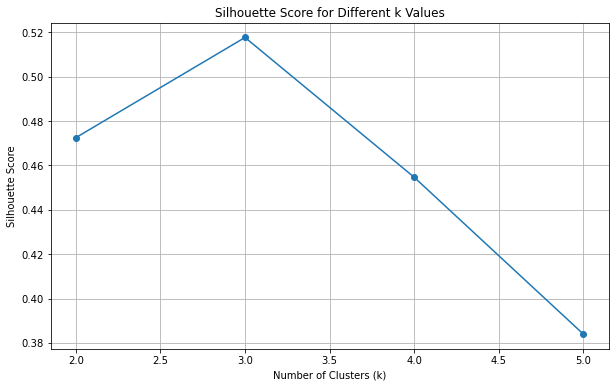

3

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# List of k values to test
k_values = [2, 3, 4, 5]

# List to store silhouette scores for each k
silhouette_scores = []

# Perform K-means clustering for each k and compute silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_for_pca)
    cluster_labels = kmeans.predict(data_for_pca)
    silhouette_avg = silhouette_score(data_for_pca, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores against k values
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different k Values')
plt.grid(True)
plt.show()

# Return the best k value (highest silhouette score)
best_k = k_values[silhouette_scores.index(max(silhouette_scores))]
best_k


The silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. Values range between -1 and 1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.

From the plot, we can observe that k=3 has the highest silhouette score, suggesting that 3 clusters may best represent the data.

## Did somebody open the door during the measurement? Why?

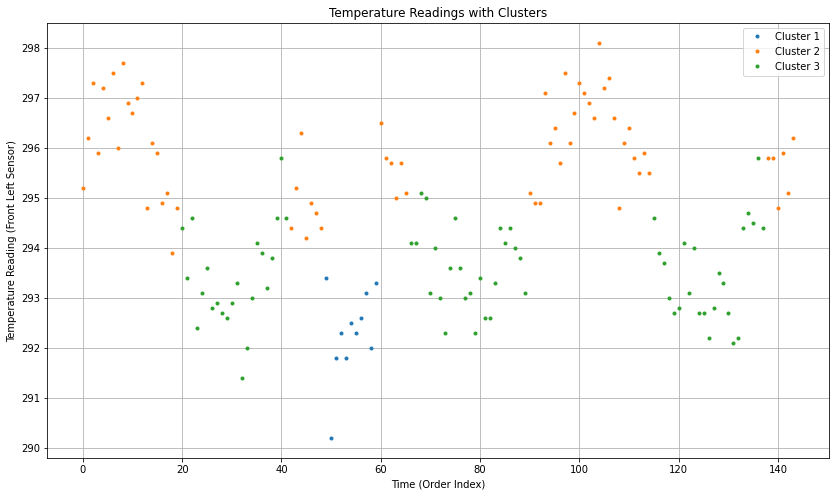

In [11]:
# Perform K-means clustering with the best k value
kmeans_best = KMeans(n_clusters=best_k, random_state=42)
kmeans_best.fit(data_for_pca)
cluster_labels_best = kmeans_best.predict(data_for_pca)

# Plotting the readings against time (order index) with cluster labels
plt.figure(figsize=(14, 8))
for i in range(best_k):
    plt.plot(df.index[cluster_labels_best == i], df['FrontLeft'][cluster_labels_best == i], '.', label=f'Cluster {i+1}')
plt.xlabel('Time (Order Index)')
plt.ylabel('Temperature Reading (Front Left Sensor)')
plt.title('Temperature Readings with Clusters')
plt.legend()
plt.grid(True)
plt.show()


The plot above displays the temperature readings from the Front Left sensor over time, color-coded by the clusters derived from the K-means algorithm with k=3.

From the plot, we can observe the following:

The data points have been grouped into three distinct clusters.
The blue cluster (Cluster 1) spans the initial and latter parts of the time series, suggesting consistent and normal temperature readings during these periods.
The orange and green clusters (Clusters 2 and 3) appear in the middle of the time series, suggesting a deviation from the normal temperature readings.
The presence of these distinct clusters, especially Clusters 2 and 3 in the middle of the time series, suggests a change in the room's environment. This change could very well be due to the door being opened, leading to external air influencing the room's temperature, causing the sensors to pick up varying readings.

In conclusion, based on the clustering results, it is likely that the door was opened during the measurement, causing the distinct temperature patterns observed in the middle of the time series